# Integration and Differentiation

In [3]:
import glob, os
from obspy import read, Stream
from obspy.core.trace import Stats
import matplotlib.pyplot as plt
%matplotlib inline 

### Get list of the folders

In [4]:
cwd = os.getcwd()

In [5]:
dirs = [ name for name in os.listdir(os.getcwd()) if os.path.isdir(os.path.join(os.getcwd(), name)) ]

### Remove unnecessary folder

In [6]:
dirs.remove('.ipynb_checkpoints')

### Get the list of the files inside in a folder

In [7]:
sacs = glob.glob(dirs[0] + '/*')

## Read all sac files 

In [8]:
st_org = Stream()
for sac in sacs:
    st_org += read(sac,format='SAC')

<img src='acc-vel-disp.png'>

### Acceleration to Velocity

/home/dertuncay/anaconda2/lib/python2.7/site-packages/matplotlib/dates.py:1100: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  ' Defaulting to {0}.'.format(interval))


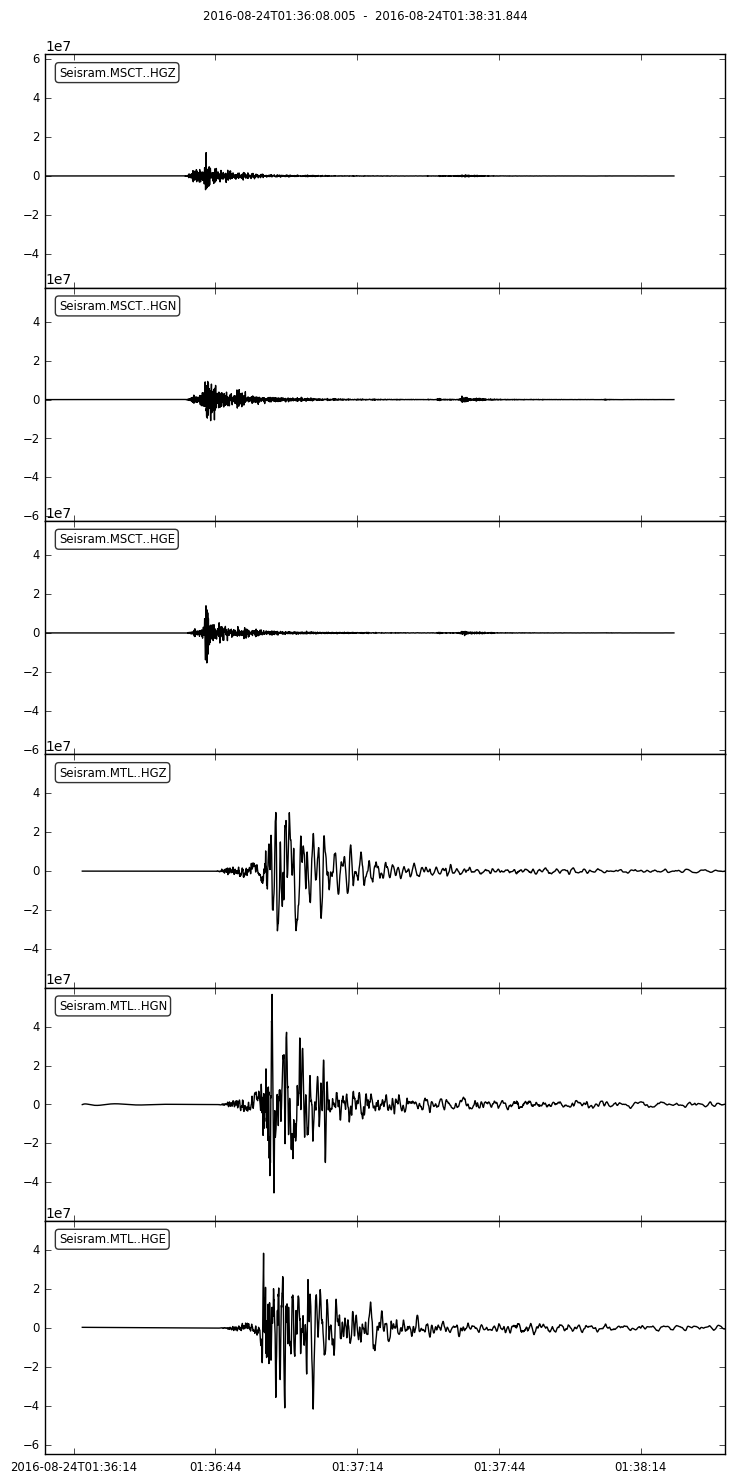

In [9]:
st_vel = st_org.copy()
st_vel.filter('highpass',freq = 0.05)
st_vel.detrend("demean")
st_vel.detrend("linear")
st_vel.integrate(method='cumtrapz')
st_vel.detrend("demean")
st_vel.detrend("linear")
st_vel.plot()

### Velocity to Displacement

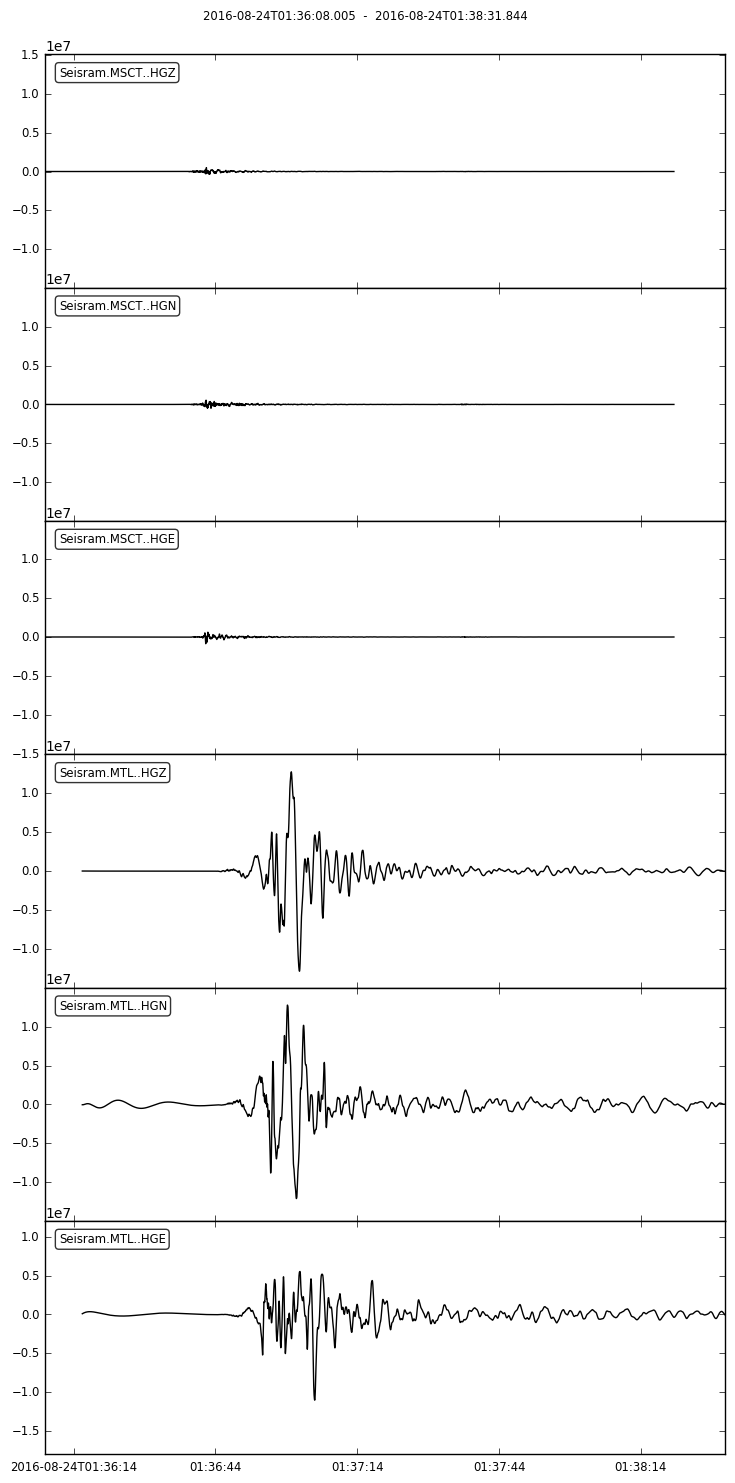

In [10]:
st_disp = st_vel.copy()
st_disp.filter('highpass',freq = 0.05)
st_disp.detrend("demean")
st_disp.detrend("linear")
st_disp.integrate(method='cumtrapz')
st_disp.detrend("demean")
st_disp.detrend("linear")
st_disp.plot()

### Displacement to Velocity

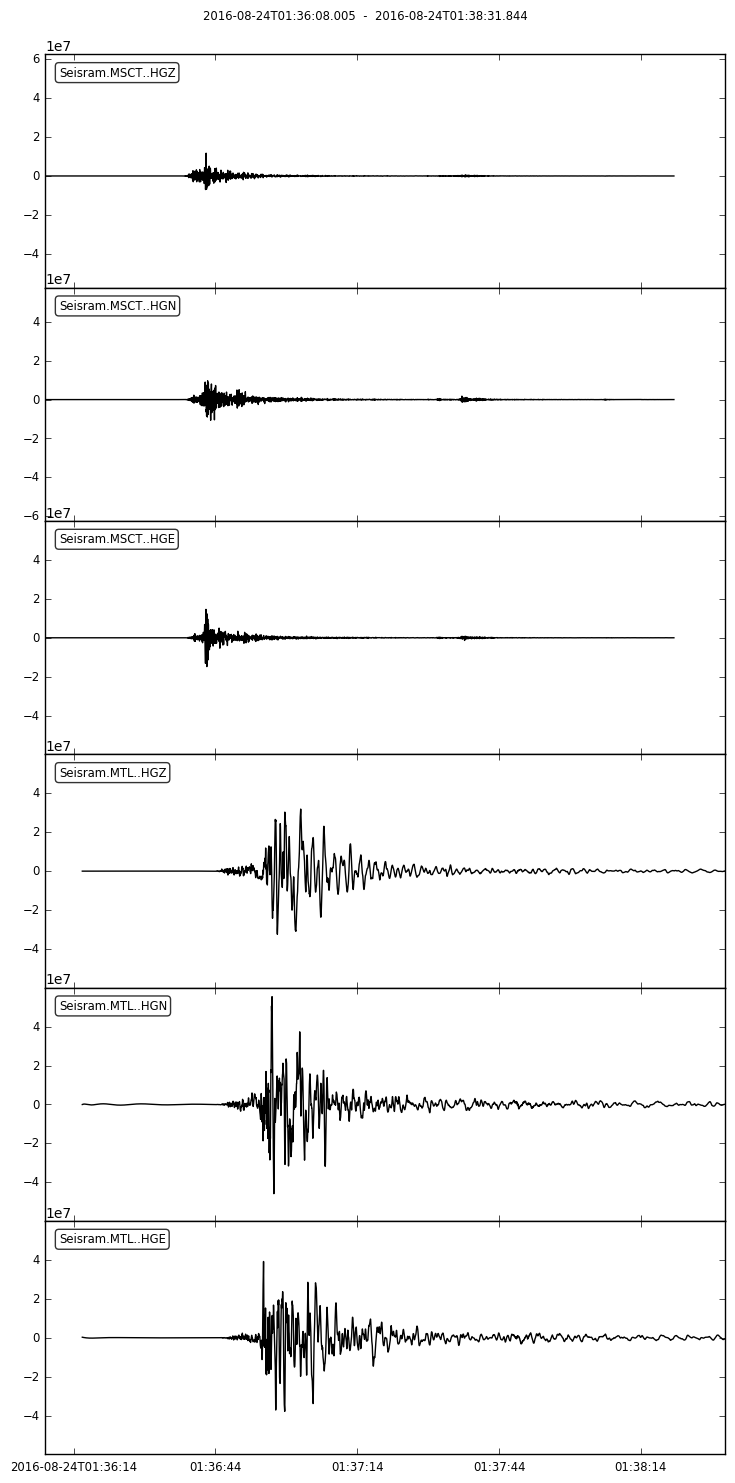

In [11]:
st_reverse = st_disp.copy()
st_reverse.filter('highpass',freq = 0.05)
st_reverse.detrend("demean")
st_reverse.detrend("linear")
st_reverse.differentiate(method='gradient')
st_reverse.detrend("demean")
st_reverse.detrend("linear")
st_reverse.plot()